In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
data=pd.read_csv(r"C:\Users\ameya\Downloads\Spam_Data.csv")

In [73]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
data.shape

(5572, 2)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [76]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [77]:
data.duplicated().sum()

403

In [78]:
data=data.drop_duplicates()

In [79]:
data.shape

(5169, 2)

In [80]:
data.sample(6)

,Category,Message
3237,ham,Good. No swimsuit allowed :)
4568,ham,At WHAT TIME should i come tomorrow
4164,spam,"Dear Voucher Holder, To claim this weeks offer..."
2947,ham,Nope but i'll b going 2 sch on fri quite early...
1096,spam,Dear Subscriber ur draw 4 å£100 gift voucher w...
1307,spam,"Get 3 Lions England tone, reply lionm 4 mono o..."


In [81]:
data['Category'].unique()

array(['ham', 'spam'], dtype=object)

<Axes: xlabel='Category', ylabel='count'>

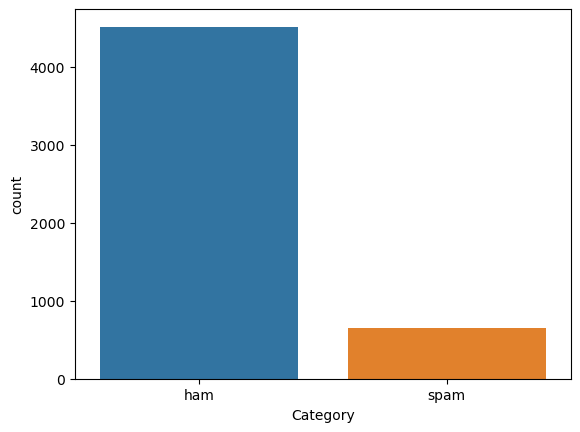

In [82]:
c=data['Category'].value_counts()
sns.countplot(x='Category',data=data)

([<matplotlib.patches.Wedge at 0x20ad8137dd0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37%'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63%')])

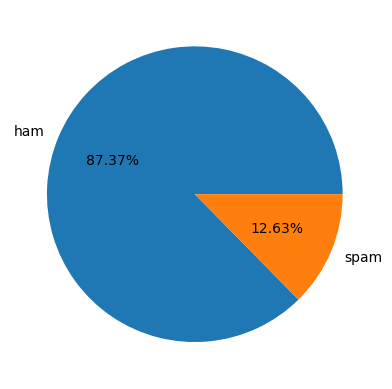

In [83]:
plt.pie(c,labels=['ham','spam'],autopct='%1.2f%%')

In [84]:
data.loc[data['Category']=='spam','Category']=0
data.loc[data['Category']=='ham','Category']=1

In [85]:
data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [86]:
data['Category'].unique()

array([1, 0], dtype=object)

In [87]:
import nltk

In [88]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ameya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
data['num_characters']=data['Message'].apply(len)

In [90]:
data.head()

,Category,Message,num_characters
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [91]:
data['num_words']=data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,Category,Message,num_characters,num_words
0,1,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15


In [92]:
data['num_sentences']=data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,Category,Message,num_characters,num_words,num_sentences
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [93]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [94]:
data[data['Category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [95]:
data[data['Category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

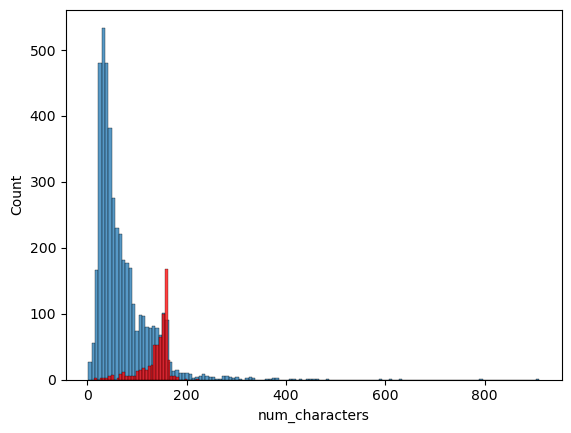

In [98]:
sns.histplot(data[data['Category']==1]['num_characters'])
sns.histplot(data[data['Category']==0]['num_characters'],color='r')

<Axes: xlabel='num_words', ylabel='Count'>

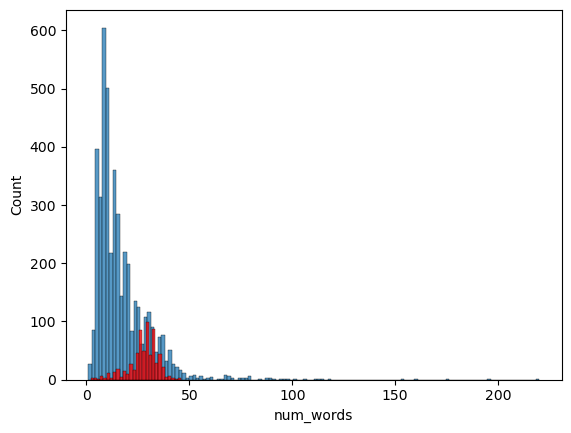

In [99]:
sns.histplot(data[data['Category']==1]['num_words'])
sns.histplot(data[data['Category']==0]['num_words'],color='r')

<Axes: xlabel='num_sentences', ylabel='Count'>

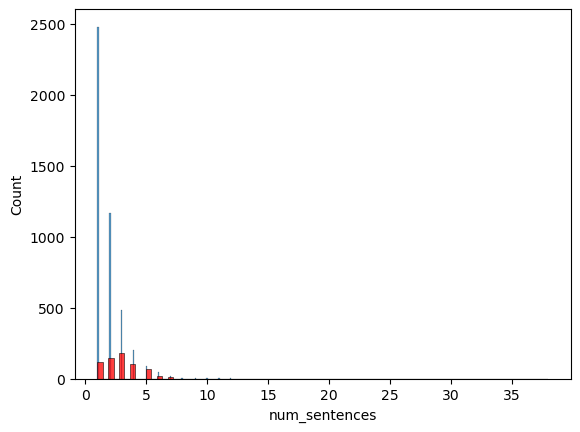

In [101]:
sns.histplot(data[data['Category']==1]['num_sentences'])
sns.histplot(data[data['Category']==0]['num_sentences'],color='r')

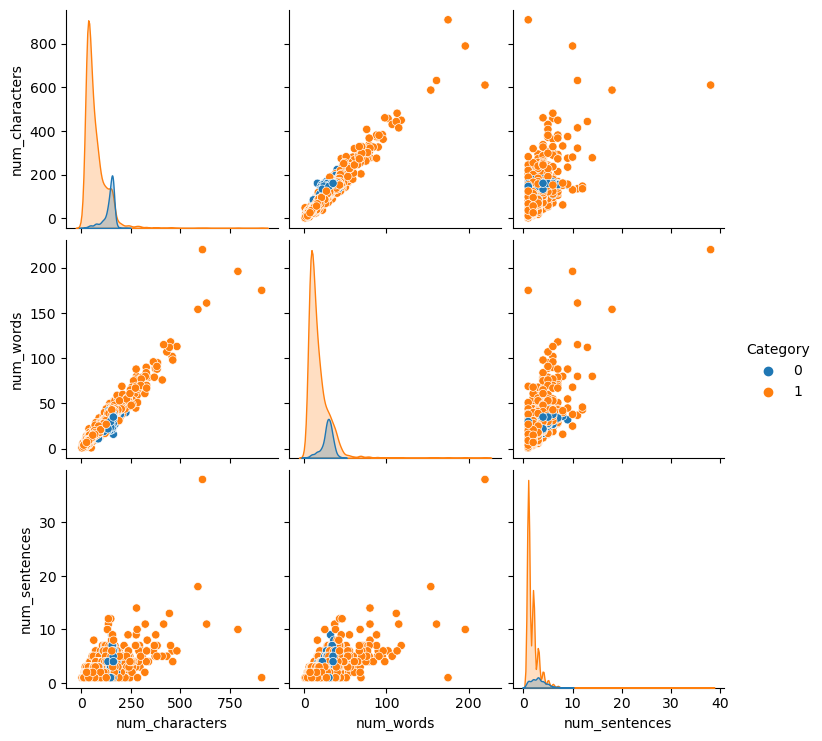

In [102]:
sns.pairplot(data,hue='Category')

C:\Users\ameya\AppData\Local\Temp\ipykernel_16668\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

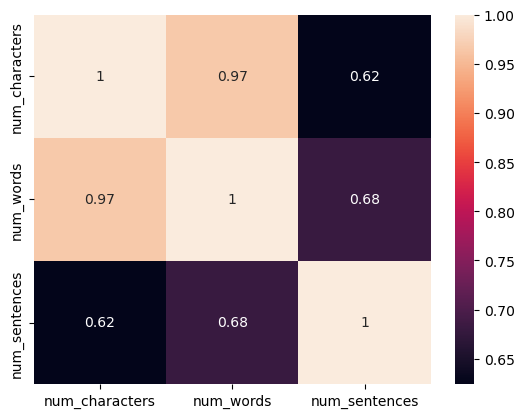

In [103]:
sns.heatmap(data.corr(),annot=True)

In [104]:
x=data['Message']
y=data['Category']

In [105]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [106]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5169, dtype: object

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)
# 10% of the data will be used for testing, and the remaining 90% will be used for training.
x.shape,x_train.shape,x_test.shape

((5169,), (4652,), (517,))

In [108]:
tfidf=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [109]:
x_train_vector=tfidf.fit_transform(x_train)
x_test_vector=tfidf.transform(x_test)

In [110]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [111]:
x_train

2931    Only 2% students solved this CAT question in '...
4395    Dear :-/ why you mood off. I cant drive so i b...
3011    Yeah no probs - last night is obviously catchi...
699              K..u also dont msg or reply to his msg..
907     I.ll give her once i have it. Plus she said gr...
                              ...                        
3534                             I'm at home. Please call
1124                   Aiyar sorry lor forgot 2 tell u...
2628    Haha... They cant what... At the most tmr forf...
3833           Watching tv lor. Nice one then i like lor.
2694    Hey sexy buns! What of that day? No word from ...
Name: Message, Length: 4652, dtype: object

In [112]:
print(x_train_vector)

  (0, 1019)	0.2871116611569076
  (0, 3280)	0.13522988190511168
  (0, 356)	0.2871116611569076
  (0, 1549)	0.27381045446393654
  (0, 1014)	0.2210131461266699
  (0, 6906)	0.15390959106928848
  (0, 3345)	0.4101079933193608
  (0, 4345)	0.4101079933193608
  (0, 7773)	0.27381045446393654
  (0, 5647)	0.2169071927376325
  (0, 1730)	0.25705291584987466
  (0, 6428)	0.27381045446393654
  (0, 6675)	0.26437309812667403
  (1, 1567)	0.38415706407701217
  (1, 2540)	0.7553898196902703
  (1, 4692)	0.4446650176423577
  (1, 2275)	0.2899699855384223
  (2, 6449)	0.310556928118986
  (2, 6491)	0.3411300936290795
  (2, 1733)	0.4523150840498148
  (2, 4982)	0.4523150840498148
  (2, 4875)	0.2781941296081459
  (2, 5551)	0.46846142668128643
  (2, 7810)	0.28488366233119117
  (3, 5841)	0.3961586417249249
  :	:
  (4646, 5724)	0.43532564027567494
  (4646, 4280)	0.3792577437753325
  (4646, 7089)	0.40944653609546494
  (4647, 3553)	1.0
  (4648, 3029)	0.47703547294556264
  (4648, 927)	0.6114722988984475
  (4648, 6459)	0.371

In [113]:
model = LogisticRegression()
model.fit(x_train_vector, y_train)

LogisticRegression()

In [114]:
x_train_prediction=model.predict(x_train_vector)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("accuracy on training data:",training_data_accuracy*100)

accuracy on training data: 96.66809974204644


In [115]:
x_test_prediction=model.predict(x_test_vector)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("accuracy on testing data:",testing_data_accuracy*100)

accuracy on testing data: 95.55125725338492


In [117]:
input=["Nah I don't think he goes to usf, he lives around here though"]
input_data=tfidf.transform(input)
prediction=model.predict(input_data)
print(prediction)

if prediction[0]==1:
    print('ham mail')
else:
    print('spam mail')

       

[1]
ham mail
